In [1]:
import sys
# Assuming we are in the notebook directory add this so that we can import the library
sys.path.append('..')

import time

import numpy as np
import dask
import GPy
from abcpy.core import *
from abcpy.distributions import *
from abcpy.examples.ma2 import *
from abcpy.methods import *
from distributed import Client
from dask.dot import dot_graph
from functools import partial

import matplotlib
import matplotlib.pyplot as plt

#matplotlib.style.use('ggplot')
#%matplotlib inline


In [2]:
n = 1000
t1 = 0.6
t2 = 0.2

# Set up observed data y
latents = np.random.randn(n+2)
y = MA2(n, 1, t1, t2, latents=latents)

# Plot
if False:
    plt.figure(figsize=(11, 6))
    plt.plot(np.arange(0,n),y[0,:])
    plt.scatter(np.arange(-2,n), latents);

In [3]:
# Set up the simulator
simulator = partial(MA2, n)

# Set up autocovariance summaries
ac1 = partial(autocov, 1)
ac2 = partial(autocov, 2)

# Specify the graphical model
t1 = Prior('t1', 'uniform', 0, 1)
#t2 = Prior('t2', 'uniform', 0, 1)
Y = Simulator('MA2', simulator, t1, t2, observed=y)
S1 = Summary('S1', ac1, Y)
S2 = Summary('S2', ac2, Y)
d = Discrepancy('d', distance, S1, S2)

# Specify the number of simulations
n_sim = 10
n_batch = 2

/home/akangasr/abcpy/.venv/lib/python3.4/site-packages/distributed/deploy/local.py - INFO - To start diagnostics web server please install Bokeh
GP - INFO - initializing Y
GP - INFO - initializing inference method
GP - INFO - adding kernel and likelihood as parameters


Sampling 10 samples in batches of 2
Observed: [[ 0.84645735]] at [[ 67.07678464]]
Observed: [[ 0.65091181]] at [[ 47.0719906]]
Observed: [[ 0.09829895]] at [[ 268.46660695]]


 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1


Observed: [[ 0.1179547]] at [[ 293.69470288]]
Observed: [[ 1.00051001]] at [[ 122.34181223]]
Observed: [[ 1.00881268]] at [[ 135.00931982]]
Observed: [[ 0.74043821]] at [[ 91.42916466]]
Observed: [[ 0.74013242]] at [[ 47.153559]]
Observed: [[ 0.48509956]] at [[ 39.06299917]]
Observed: [[ 0.43204089]] at [[ 80.40258399]]
Using minimum value of discrepancy estimate mean (4.0527) as threshold
ML parameters: [ 0.29863603]
MAP parameters: [ 0.2984332]


 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


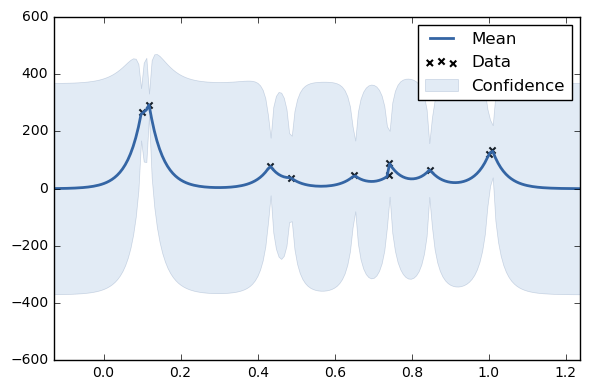

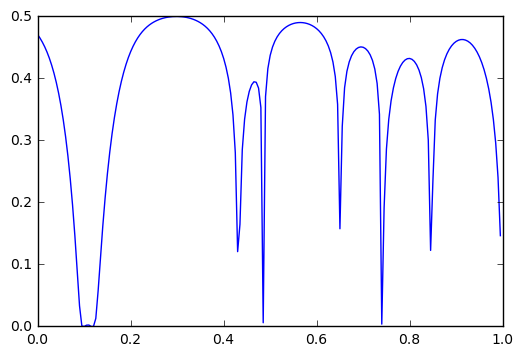

In [4]:
bolfi = BOLFI(10, d, [t1], batch_size=n_batch, n_surrogate_samples=n_sim)
post = bolfi.infer()
fig = bolfi.model.gp.plot()
GPy.plotting.show(fig)
post.plot()

/home/akangasr/abcpy/.venv/lib/python3.4/site-packages/distributed/deploy/local.py - INFO - To start diagnostics web server please install Bokeh
GP - INFO - initializing Y
GP - INFO - initializing inference method
GP - INFO - adding kernel and likelihood as parameters


Sampling 10 samples asynchronously 2 samples in parallel
Observed: [[ 0.401692]] at [[ 84.75065065]]
Observed: [[ 0.4940268]] at [[ 52.83943317]]


 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1


Observed: [[ 1.0291388]] at [[ 148.34052808]]
Observed: [[ 0.00862167]] at [[ 380.10087175]]
Observed: [[ 1.16069374]] at [[ 162.86119201]]
Observed: [[ 0.0364764]] at [[ 394.77427156]]
Observed: [[ 1.28771064]] at [[ 180.42655209]]
Observed: [[ 0.43484251]] at [[ 31.66354942]]


 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/GPy/kern/src/stationary.py:160: RuntimeWarning:overflow encountered in true_divide
 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/GPy/kern/src/stationary.py:198: RuntimeWarning:invalid value encountered in multiply


Observed: [[ 1.02740017]] at [[ 106.03914806]]
Observed: [[ 0.70290132]] at [[ 19.19470922]]
Using minimum value of discrepancy estimate mean (19.1983) as threshold
ML parameters: [ 0.70281525]
MAP parameters: [ 0.70284881]


 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


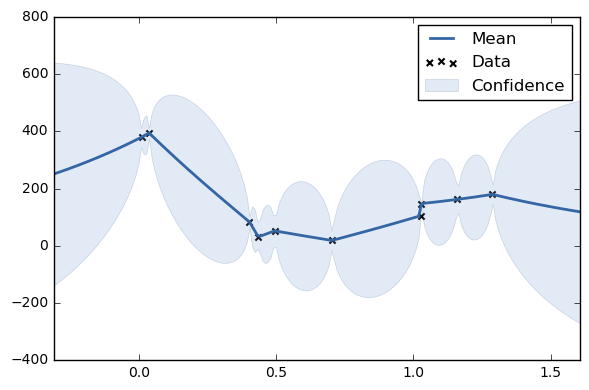

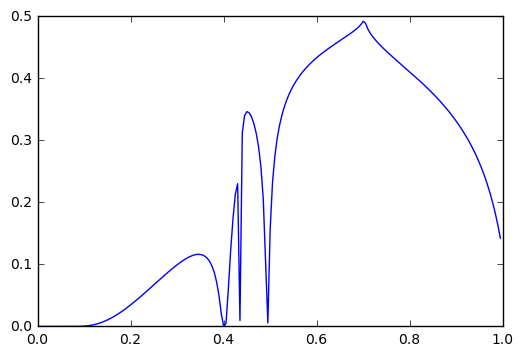

In [8]:
async_bolfi = BOLFI(10, d, [t1], sync=False, batch_size=n_batch, n_surrogate_samples=n_sim)
async_post = async_bolfi.infer()
fig = async_bolfi.model.gp.plot()
GPy.plotting.show(fig)
async_post.plot()

In [6]:
from IPython.display import display
display(bolfi.model.gp)
display(async_bolfi.model.gp)